In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
url='https://raw.githubusercontent.com/WaTheDarknest/CSI/main/Dataset/Dataset/%E0%B8%8A%E0%B8%B1%E0%B9%89%E0%B8%992/TX1(%E0%B8%8A%E0%B8%B1%E0%B9%89%E0%B8%992)(%E0%B8%AB%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%9B%E0%B8%81%E0%B8%95%E0%B8%B4)(2%E0%B8%84%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%B4%E0%B8%99%E0%B9%82%E0%B8%8B%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A7%E0%B8%81%E0%B8%B1%E0%B8%99)(60Sec).csv'
dataset=pd.read_csv(url)
dataset

<ipython-input-52-402b60c00a36>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv(url)


,real_timestamp,Delta t,Zone,R1,I1,Mag1,R2,I2,Mag2,R3,...,Mag61,R62,I62,Mag62,R63,I63,Mag63,R64,I64,Mag64
0,1.72758,-,1,4,65,65.122961,16,0,16,0,...,0,0,0,0,0,0,0,0,0,0
1,1.92763,0.20005,1,28,-64,69.856997,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.93484,0.00721,1,-99,-48,110.022725,9,0,9,0,...,0,0,0,0,0,0,0,0,0,0
3,1.95008,0.01524,1,-121,112,164.878743,8,0,8,0,...,0,0,0,0,0,0,0,0,0,0
4,1.95998,0.0099,1,-122,-31,125.876924,23,0,23,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22597,59.94710,0.0076,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
22598,59.96090,0.0138,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
22599,59.97810,0.0172,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
22600,59.98720,0.0091,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
test_size=0.6
X_train, X_test, y_train, y_test = train_test_split(
    dataset[[ 'Mag7', 'Mag8', 'Mag9', 'Mag10', 'Mag11', 'Mag12', 'Mag13', 'Mag14', 'Mag15', 'Mag16'
              , 'Mag17', 'Mag18', 'Mag19', 'Mag20', 'Mag21', 'Mag22', 'Mag23', 'Mag24', 'Mag25', 'Mag26'
              , 'Mag27', 'Mag28', 'Mag29', 'Mag30', 'Mag31', 'Mag32', 'Mag34', 'Mag35', 'Mag36', 'Mag37'
              , 'Mag38', 'Mag39', 'Mag40', 'Mag41', 'Mag42', 'Mag43', 'Mag44', 'Mag45', 'Mag46', 'Mag47'
              ,'Mag48', 'Mag49', 'Mag50', 'Mag51', 'Mag52', 'Mag53', 'Mag54', 'Mag55', 'Mag56', 'Mag57'
              , 'Mag58', 'Mag59']], #52
# 'Mag1', 'Mag2'                                                                                                                 ไม่นำมาพิจารณาเพราะว่าตัวแปรดังกล่าวค่าส่วนใหญ่มีค่าที่ซ้ำกัน
# 'Mag3', 'Mag4', 'Mag5', 'Mag6', 'Mag33', 'Mag60', 'Mag61', 'Mag62', 'Mag63', 'Mag64'               ไม่นำมาพิจารณาเพราะว่าตัวแปรดังกล่าวมีค่าเป็น 0
dataset.Zone,
test_size=test_size, random_state=7)

In [54]:
prefer_k = 64
model = KNeighborsClassifier(n_neighbors=prefer_k)
model

KNeighborsClassifier(n_neighbors=64)

In [55]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=64)

In [56]:
model.score(X_train, y_train)

0.4786504424778761

In [57]:
model.score(X_test, y_test)

0.45546379590030966

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.46073009, 0.43860619, 0.44081858, 0.44690265, 0.46238938])

In [59]:
from numpy import mean, std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.450 (0.010)


ทดลองหาค่า k ที่เหมาะสมที่สุด

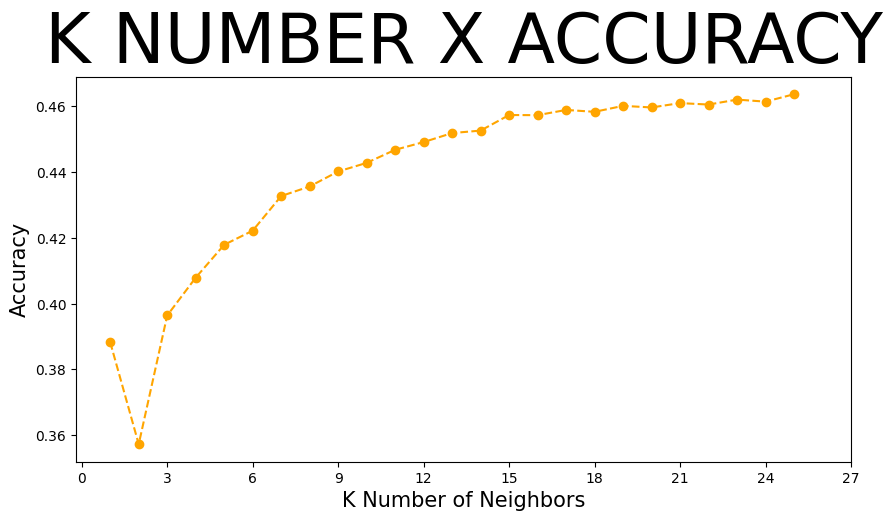

The best value of k = {'n_neighbors': 25} with 0.46371845840355624 of accuracy.


In [60]:
# กำหนดช่วงค่า K ที่ต้องการทดสอบ
k_list = list(range(1,25+1))
k_values = dict(n_neighbors=k_list)

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')

grid.fit(dataset[[ 'Mag7', 'Mag8', 'Mag9', 'Mag10', 'Mag11', 'Mag12', 'Mag13', 'Mag14', 'Mag15', 'Mag16'
              , 'Mag17', 'Mag18', 'Mag19', 'Mag20', 'Mag21', 'Mag22', 'Mag23', 'Mag24', 'Mag25', 'Mag26'
              , 'Mag27', 'Mag28', 'Mag29', 'Mag30', 'Mag31', 'Mag32', 'Mag34', 'Mag35', 'Mag36', 'Mag37'
              , 'Mag38', 'Mag39', 'Mag40', 'Mag41', 'Mag42', 'Mag43', 'Mag44', 'Mag45', 'Mag46', 'Mag47'
              ,'Mag48', 'Mag49', 'Mag50', 'Mag51', 'Mag52', 'Mag53', 'Mag54', 'Mag55', 'Mag56', 'Mag57'
              , 'Mag58', 'Mag59']], dataset.Zone)

grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()
graphic = grid.cv_results_['mean_test_score']
graphic

# พล็อตกราฟค่าประสิทธิภาพ
plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='orange',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 50})
plt.xticks(range(0,30,3),)
plt.show()

print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))